# Particulate Matter Playground

<img src="https://www.komputer.de/wordpress/wp-content/uploads/2018/01/nova_pm_sensor03.jpg" alt="image of SDS011" width="600px">

There is a short python script in this folder: pm2csv.py that can be used to read a SDS011 particulate matter sensor (shown above) on your laptop and saves the readings into a csv file (called pm.csv). The sensor could be bought here, for example: https://www.komputer.de/zen/index.php?main_page=product_info&products_id=458&zenid=890tk4o4j3pua85jiv77omec21

The script needs at least the address of the connected device. This is usually `/dev/ttypUSB0`, maybe with another number than 0. The other aguments to the script are optional. The second rate is the baud rate, or cummunication speed, which is 9600 here. The third argument is the filename for the csv file and the fourth argument is the measurement interval in seconds. It is important that you use your Python 3 interpreter to run the script.

An sample call could look like:

```bash
python3 pm2csv.py /dev/ttyUSB0 9600 anotherfile.csv 5
```

The script needs the `serial` library. Install it with pip like

```bash
pip3 install pyserial
```

## Example

These readings are taken inside the ICE 78 from Freiburg to Karlsruhe on October, 26 2018. Be aware that the time is given in UTC.

In [1]:
import pandas as pd
pm = pd.read_csv('pm_ICE_Freiburg_Karlsruhe.csv', header=None, parse_dates=[0])
pm.columns = ['time', 'PM10', 'PM25']
pm.head()

,time,PM10,PM25
0,2018-10-26 05:51:29,14.9,8.4
1,2018-10-26 05:51:44,14.8,8.4
2,2018-10-26 05:51:59,13.9,8.3
3,2018-10-26 05:52:14,14.4,8.3
4,2018-10-26 05:52:30,14.2,8.4


In [2]:
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('ggplot')

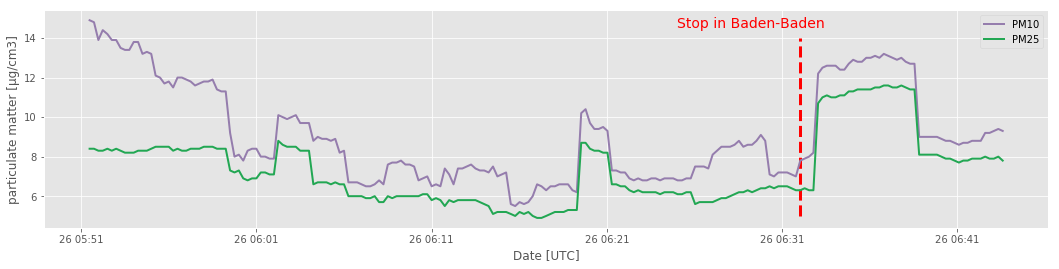

In [3]:
#plot
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(pm.time, pm.PM10, label='PM10', color='#957DAD', lw=2)
ax.plot(pm.time, pm.PM25, label='PM25', color='#22A753', lw=2)
ax.vlines(dt.datetime(2018, 10, 26, 6, 32), ymin=5, ymax=14, linestyle='--', lw=3, color='red')
ax.text(dt.datetime(2018, 10, 26, 6, 25), 14.5, 'Stop in Baden-Baden', color='red', size=14)
ax.legend(loc='upper right')
ax.set_ylabel('particulate matter [µg/cm3]')
ax.set_xlabel('Date [UTC]');